# Practical Week 6: Introduction to Machine Learning

In this practical you will familiarise yourself with some of the Python libraries that we will be using for machine learning in the coming weeks. You will learn how to use [`numpy`](https://numpy.org/) and [`pandas`](https://pandas.pydata.org/) for manipulating data, and [`seaborn`](https://seaborn.pydata.org/) for visualising data.


## Tabular Data

First, we will learn how to manipulate tabular data. Most machine learning systems represent data as multi-dimensional arrays. The `numpy` library provides efficient ways to access and compute with such multi-dimensional arrays. The `pandas` library augments this with human-readable indexes and convenience functions for displaying and filtering data.

Let us explore how multi-dimensional arrays work in these libraries.

We start by importing `numpy`:

In [ ]:
import numpy as np

Let's create a one-dimensional array containing some numbers:

In [ ]:
my_array = np.array([1,3,4,7,-1,2])
my_array

array([ 1,  3,  4,  7, -1,  2])

We can select elements from that array by specifying an index, or a set of indices, or a slice:

In [ ]:
print(my_array[0])
print(my_array[2])

1
4


In [ ]:
my_array[[0,2,3]]

array([1, 4, 7])

In [ ]:
my_array[:3]

array([1, 3, 4])

In [ ]:
my_array[3:]

array([ 7, -1,  2])

We can also define functions that operate on all elements of the array:

In [ ]:
def add_one(xs):
    return xs + 1

In [ ]:
add_one(my_array)

array([2, 4, 5, 8, 0, 3])

Now, let us create a 2-dimensional array (a "matrix"):

In [ ]:
matrix = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
matrix

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

We can select individual elements of the matrix via their index. We use the convention that the first index refers to the *row*, and the second index referst to the *column*.

In [ ]:
matrix[0,2] # first row, third element

3

In [ ]:
matrix[0,:] # entire first row

array([1, 2, 3])

In [ ]:
matrix[:,2] # entire third column

array([ 3,  6,  9, 12])

We can slice arrays into smaller arrays. Let's extract all but the last column from our matrix:

In [ ]:
matrix[:,:-1]

array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])

Similarly, we can get the last column:

In [ ]:
matrix[:,-1]

array([ 3,  6,  9, 12])

We can also slice based on conditions. For example, let's extract all rows where the element in the second column is greater than 3. First, we'll find which rows are relevant (True or False for each row), then we'll extract the rows.

In [ ]:
selected = matrix[:,2]>3
selected

array([False,  True,  True,  True])

In [ ]:
matrix[selected]

array([[ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

We can also calculate with the entire matrix or columns/rows. Let's sum all the numbers in the full matrix, in each column, and in each row:

In [ ]:
matrix.sum() # sums all the elements in the array

78

In [ ]:
matrix.sum(axis=0) # sums each column

array([22, 26, 30])

In [ ]:
matrix.sum(axis=1) # sums each row

array([ 6, 15, 24, 33])

Finally, let us change the shape of the array. Initially, we have a 4-by-3 matrix:

In [ ]:
matrix.shape

(4, 3)

Let's turn this into a one-dimensional array:

In [ ]:
np.reshape(matrix, (12)) # simple array of 12 elements

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
np.reshape(matrix, (1,12)) # 2-dimensional array with 1 row and 12 columns

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [ ]:
np.reshape(matrix, (12,1)) # 2-dimensional array with 12 rows and 1 column

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

Manipulating data structures in this way is really powerful and fast -- much faster than if we looped over the elements using plain python constructs. However, it would be more convenient if we could attach labels to each dimension so that we can keep track more easily what the values mean. The [`pandas`](https://pandas.pydata.org/) library provides us with classes and functions that enable us to do precisely that. 

Let's import [`pandas`](https://pandas.pydata.org/) and create a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) from the matrix. A DataFrame is essentially a 2-dimensional array containing values, where each column and row can be associated with labels and other descriptive information.

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(matrix)
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


Let's add some column labels:

In [ ]:
df.columns = ['A','B','C']
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


We can also look at the first few rows of the data frame (this won't do much here since we have only a few rows), and obtain a summary of the content of each column:

In [ ]:
df.head() # show the first 5 rows

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


In the following, we will call the rows "samples" and the columns "attributes", "features", or "variables". In the above table, there are 4 samples (0,..,3) and 3 variables (A,B,C).

Let's summarise the values in the data frame.

In [ ]:
df.describe()

,A,B,C
count,4.000000,4.000000,4.000000
mean,5.500000,6.500000,7.500000
std,3.872983,3.872983,3.872983
min,1.000000,2.000000,3.000000
25%,3.250000,4.250000,5.250000
50%,5.500000,6.500000,7.500000
75%,7.750000,8.750000,9.750000
max,10.000000,11.000000,12.000000


We see that there are 4 samples in the data frame (and that there are no missing values, since each column has the same count of 4), along with some descriptive statistics including the minimum value (`min`), maximum value (`max`), mean value (`mean`), quartiles (25%, 50%, 75%), and standard deviation (`std`). Some of these may not make sense to you unless you have learned some basic statistics.

We can access the data in the same way as we did earlier, and we can use the column labels to do this:

In [ ]:
df['A'] # we want the entire column

0     1
1     4
2     7
3    10
Name: A, dtype: int64

We can also select rows and columns we are interested in. Property [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) enables us to access (and also assign) parts of a data frame.

In [ ]:
df.loc[:,'A'] # all samples, only column A

0     1
1     4
2     7
3    10
Name: A, dtype: int64

In [ ]:
df.loc[1:2,'A']


1    4
2    7
Name: A, dtype: int64

In [ ]:
df.loc[1:2,'A':'B'] # samples indexed 1 and 2, attributes A and B

,A,B
1,4,5
2,7,8


Sometimes, we may want to remove one attribute:

In [ ]:
df.drop('C', axis=1) # axis 1 is the column axis; drop returns a copy. The original data frame remains unaffected.

,A,B
0,1,2
1,4,5
2,7,8
3,10,11


In [ ]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


We can create additional attributes in the data frame.

In [ ]:
df2 = df.assign(CPLUS1=lambda d: d['C'] + 1) # this does not modify the original data frame
df2

,A,B,C,CPLUS1
0,1,2,3,4
1,4,5,6,7
2,7,8,9,10
3,10,11,12,13


We can also destructively assign values to the data frame cells. However, we should use this sparingly.

For example, let's change the cell in row 2 column CPLUS1 from 10 to 20.

In [ ]:
df2.loc[2,'CPLUS1'] = 20
df2

,A,B,C,CPLUS1
0,1,2,3,4
1,4,5,6,7
2,7,8,9,20
3,10,11,12,13


Assignment works in a similar way to selecting. We can use slices and conditions.

In [ ]:
df2.loc[0:2,['A','CPLUS1']] = 1234
df2

,A,B,C,CPLUS1
0,1234,2,3,1234
1,1234,5,6,1234
2,1234,8,9,1234
3,10,11,12,13


Assign the value `9876` to all cells in column `CPLUS` in rows where `B>3` and `C<10`.

In [ ]:
# TODO


,A,B,C,CPLUS1
0,1234,2,3,1234
1,1234,5,6,9876
2,1234,8,9,9876
3,10,11,12,13


## Explore some data

Let us now load some data and explore it.

We will use the *Boston House Pricing Data Set* that comes with the *scikit-learn* (`sklearn`) library as an example. This data set contains data about dwellings and prices by township in Boston.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_csv('/content/drive/MyDrive/MachineLearning/AI&ML Course/Lab6/housing.csv',header=None, delimiter=r"\s+", names=column_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


We see that there are 506 samples and 13 features. Let's see what they mean:

Next, let's explore the data set further. Can you determine the minimum, maximum, and mean values of each feature?

In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Can you determine the lowest/highest/median average number of rooms per dwelling (`RM`)?

TODO

Next, let's see what the properties are of the townships where `MEDV` exceeds 40.

Use `loc` to select the relevant rows and use `describe()` to see their properties

In [5]:
boston_df.loc[boston_df['MEDV']>40].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1.555269,22.403226,8.707419,0.225806,0.533806,7.647484,66.280645,3.366045,8.064516,352.387097,16.103226,383.663871,4.160968,47.451613
std,2.539431,34.244810,7.258760,0.425024,0.092315,0.820507,30.046912,1.911869,7.320908,152.854109,2.475141,11.064771,1.851013,3.164161
min,0.013810,0.000000,0.460000,0.000000,0.394000,4.970000,8.400000,1.129600,1.000000,193.000000,13.000000,347.880000,1.730000,41.300000
25%,0.058655,0.000000,3.330000,0.000000,0.442900,7.479500,35.550000,2.005800,4.500000,259.500000,14.700000,377.290000,3.110000,44.400000
50%,0.526930,0.000000,5.860000,0.000000,0.507000,7.820000,73.300000,2.894400,5.000000,307.000000,14.900000,386.860000,3.700000,50.000000
75%,1.491190,20.000000,18.100000,0.000000,0.618000,8.253000,92.700000,4.906350,8.000000,403.000000,17.600000,391.300000,4.520000,50.000000
max,9.232300,95.000000,19.580000,1.000000,0.668000,8.725000,100.000000,8.906700,24.000000,666.000000,20.200000,396.900000,9.530000,50.000000


We may be interested in finding out which feature is most strongly associated with the target `MEDV`. We can compute the *[correlation coefficient](https://en.wikipedia.org/wiki/Correlation)* between each feature and `MEDV`. Correlation is a measure between -1 and 1, where values near +1 indicate that there is a strong (linear) increasing  association between two attributes, values near -1 indicate that there is a strong inverse (decreasing) relationship between two attributes, and values near 0 indicate that there is no (linear) relationship between the two attributes. 

In [6]:
boston_df.corrwith(boston_df['MEDV']).drop('MEDV').sort_values() # compute correlation, drop the MEDV column, and sort by value

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
dtype: float64

The above statement computed the correlation between each column in the data frame and the `MEDV` column, then it removed the `MEDV` column (because all values are `1.0`), and then it sorted the results by correlation.
 
Can you determine which attribute has the strongest direct relationship with the target `MEDV`? What do we learn from this?

TODO

## Plotting Data

Visualising data can tell us a lot about the data set we are investigating. As part of any machine learning activity, we must first understand the data. Exploring the data and visualising it play an important role in this.

We will use [`matplotlib`](https://matplotlib.org/) and [`seaborn`](https://seaborn.pydata.org/) library to visualise the data.

First, we import the libraries.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

We already know that the average number of rooms per dwelling falls in the range `[3.561,8.78]`. However, we may want to learn more about the distribution of values within this range. We can investigate this by plotting the distribution as a histogram.

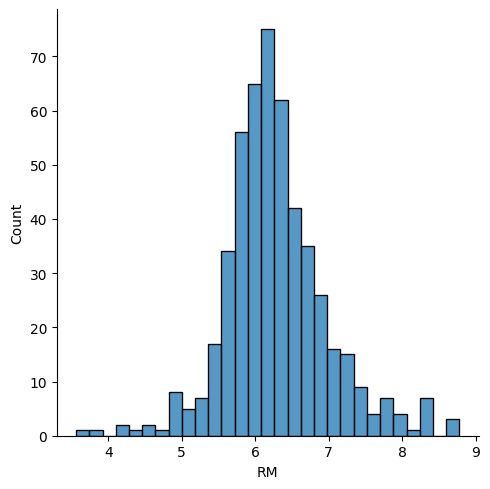

In [8]:
sns.displot(data=boston_df, x='RM');

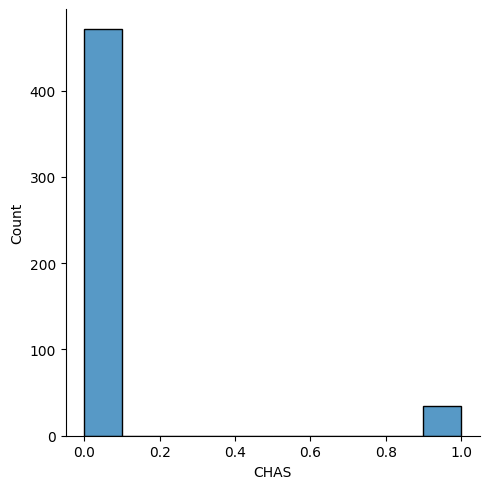

In [9]:
sns.displot(data=boston_df, x='CHAS');

We see that this feature has only two distinct values (0 and 1), and that the number of zeros vastly outnumbers the ones. This situation is called *imbalance*.

Let's do the same for the target, `MEDV`:

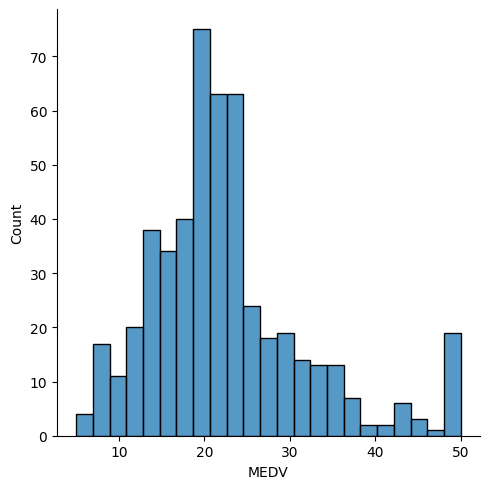

In [10]:
sns.displot(data=boston_df, x='MEDV');

We see that most townships have median prices between 10 and 40.

Can you determine which is the most frequently occurring median price? What does the spike near 50 indicate?

TODO

In addition to understanding individual attributes, it is valuable to understand the relationship among variables. Let us visualise the relationship between `RM` and `MEDV`:

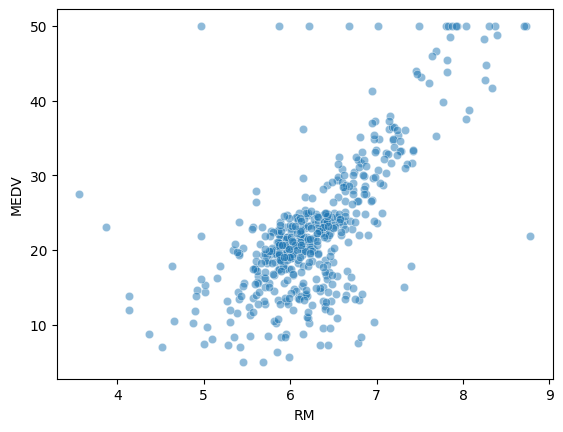

In [11]:
sns.scatterplot(data=boston_df, x='RM',y='MEDV', alpha=0.5);

We can see that most towns where dwellings where `RM` is between 5 and 7 have median house prices in the range [10,30]. However, there are some outliers, where the price is much higher. Let's find them in the data, by selecting all samples where `RM` is in the rage [5,7] and `MEDV` is 40 or higher. We do this by building an expression that evaluates to `True` for each sample where the condition we are interested is satisfied. Then, we use the resulting array of True/False values as index when selecting the samples.

In [12]:
condition  = boston_df['RM'].between(5,7) & (boston_df['MEDV'] >= 40) # placing parentheses is important
boston_df.loc[condition]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.10,1,0.668,5.875,89.6,1.1296,24,666.0,20.2,347.88,8.88,50.0


How many such outliers are in the data set?

TODO

Next, we may want to look at the relationship between more pairs of the attributes. Suppose we are interested in the mutual relationships among the attributes `LSTAT`, `CRIM`, `ZN`, `RM`, and `MEDV`.

As before, we can compute the correlation coefficient for each pair of attributes. This time, let us visualise the result as a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

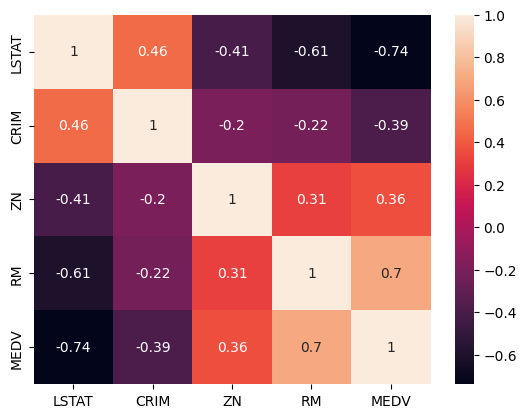

In [13]:
interesting_vars = ['LSTAT','CRIM','ZN','RM','MEDV']
correlation_matrix = boston_df[interesting_vars].corr().round(2) # compute pairwise correlation, rounded to two digits
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

As before, we see that `RM` and `MEDV` have the strongest positive correlation and `LSTAT` and `MEDV` have the strongest inverse correlation. We can also see that some other pairs of attributes have a relatively strong relationship. For example, `RM` and `LSTAT` have a quite strong inverse relationship.

Understanding how the attributes relate to each other and to the target can be important when deciding which attributes to use for machine learning.

We can use [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to plot each pair of attributes, so that we can visually inspect the relationships that are indicated in the heatmap above.

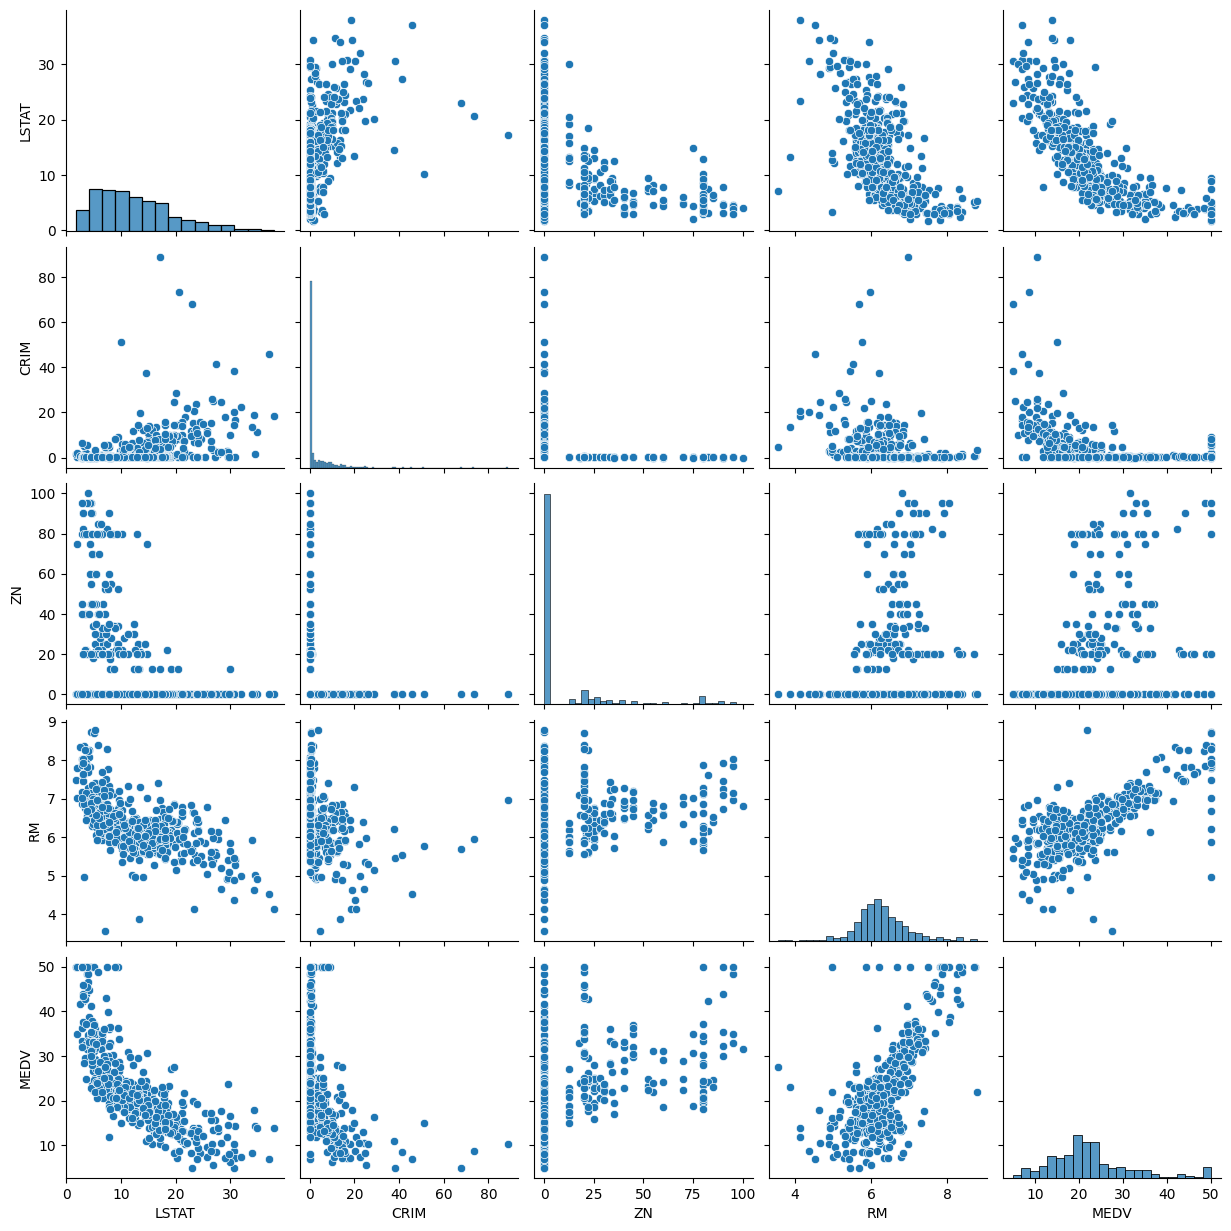

In [14]:
sns.pairplot(data=boston_df, vars=interesting_vars);  # this may take a few seconds

The resulting plot shows us the distribution of each attribute as histograms on the diagonals, and the pairwise relationships among the variables as scatterplots on the off-diagonal cells.

We can confirm that there is a strong increasing relationship between `RM` and `MEDV`. The scatterplot in the last column of the fourth row shows that if `RM` and `MEDV` tend to increase together (the scaterplot is sloped upwards). Similarly, we can confirm the negative relationship between `LSTAT` and `MEDV` we obtained when looking at the correlation coefficient (the scatterplot is sloped downwards). We can also see that there is no obvious strong relationship between `ZN` and `MEDV` (there is no obvious slope in the scatterplot). 

Suppose we wish to visualise the "expensive" properties, where `MEDV` exceeds `6*RM`.

We can do this by color-coding each sample. We will do this by introducing an additional feature, named `EXPENSIVE`, that is `True` when `MEDV>6*RM` and `False` otherwise.

In [15]:
boston_df_exp = boston_df.assign(EXPENSIVE=lambda s: s['MEDV']>6*s['RM'])
boston_df_exp

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,EXPENSIVE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,False
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,False
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,False
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,False


How many "expensive" townships are there? You can compute this by summing `EXPENSIVE`.

In [16]:
# TODO


17

ANSWER: There are 17 such townships.

Next, let's plot the relationship between `RM` and `MEDV` while color-coding the expensive properties:

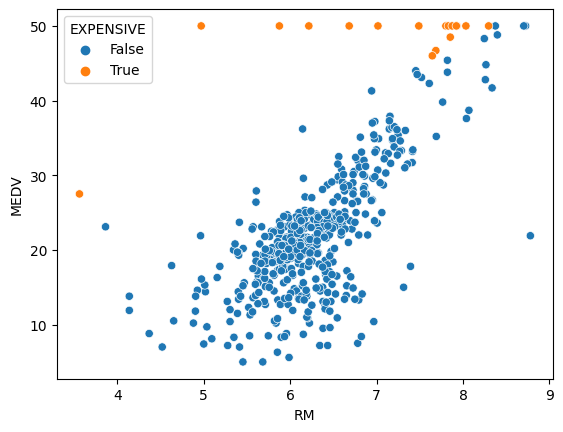

In [17]:
sns.scatterplot(data=boston_df_exp, x='RM', y='MEDV', hue='EXPENSIVE');

As you may have anticipated, most townships were dwellings are expensive relative to the number rooms per dwelling have price levels in the top range, although not all high-pricing townships are classified as expensive. There is one township that is considered to be expensive although its `MEDV` is not among the highest ones.

Out of curiosity, let us see how the expensive townships fare in terms of distance from Boston business centres.

Create a scatterplot showing `RM` against `DIS`, and distinguish each sample by `EXPENSIVE`.

<Axes: xlabel='RM', ylabel='DIS'>

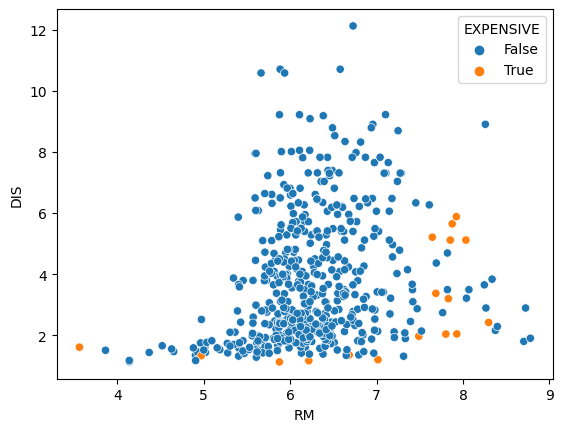

In [18]:
# TODO


Can you characterise which townships are considered `EXPENSIVE` only based on `RM` and `DIS`?

TODO

Suppose we have developed a formula to compute `MEDV` based on `RM` and `AGE` only. 

Let us define a function `boston_model_RM` which attempts to compute `MEDV` from given `RM` (and ignores all the other features). This function takes an 1-dimensional array of `RM` values as input and returns a 1-dimensional array of predicted `MEDV` values.

Use the formula `MEDV = 10*RM - 40` to compute the predicted MEDV values from the given RM values.

In [19]:
def boston_model_RM(rm):
    # TODO
    return 

Now, let's create an array with hypothetical values for `RM` and invoke the function to predict the expected `MEDV`. We will generate 40 values for RM in the range [5,9] in increments of 0.1. The numpy function [`np.arange`](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) does this for us.

In [21]:
import numpy as np

rm_range = np.arange(5, 9, 0.1)
medv_pred = boston_model_RM(rm_range)
medv_pred

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49.])

To see if this works well, let's overlay the predictions on top of the boston data.

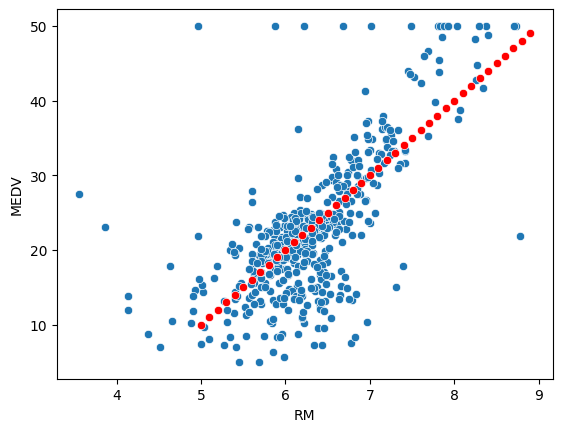

In [22]:
sns.scatterplot(data=boston_df, x='RM', y='MEDV')
sns.scatterplot(x=rm_range, y=medv_pred, color='red');

We see that although the predictions appear to be in the midst of the data, there are many large deviations. This tells us that the model does not fit very well. Perhaps unsurprisingly, average dwelling size is not enough to build a good predictor. 

In a later lecture we will see how we may quantify the performance of a predictor, so that we can compare and optimise its performance.

## Classification

To finish this introduction, let's distinguish small-, medium-, and large dwellings. 

Amend the data frame to distinguish among the three sizes. We'll classify dwellings as follows:

* SMALL: `RM <= 5`
* MEDIUM: `5 < RM <= 7`
* LARGE: `7 < RM`

Add an attribute `SIZE` to the data frame that indicates the size of the dwelling as per above classification.

Use [`pd.cut()`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) to compute the values for this attribute.

In [23]:
df_sizes = pd.cut(boston_df.RM, bins=[0,5,7,1000], labels=['small','medium','large'])

In [24]:
boston_df_size = boston_df.assign(SIZE=df_sizes)

Plot `RM` against `MEDV` while using hue to distinguish different values of `SIZE`.

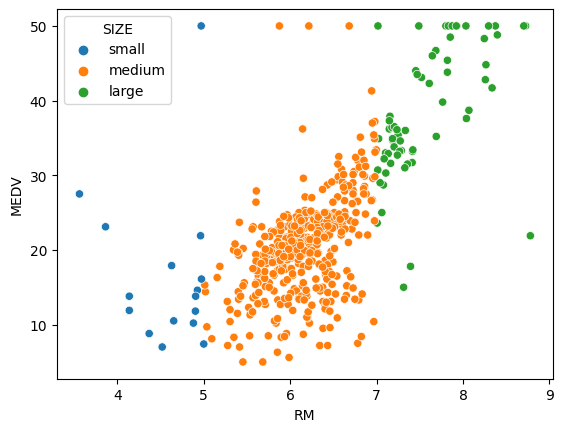

In [25]:
sns.scatterplot(data=boston_df_size, x='RM', y='MEDV', hue='SIZE');

Plot a histogram showing the distribution of `SIZE`.

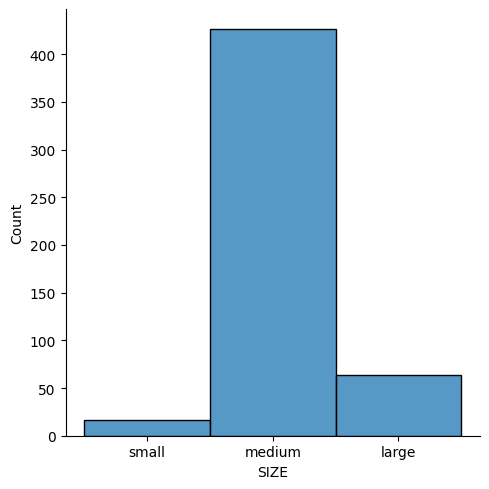

In [26]:
sns.displot(data=boston_df_size, x='SIZE');

You have reached the end of this practical. You are now familiar with the basics of manipulating and interrogating data sets using `numpy` and `pandas`, and you can use `seaborn` to visualise data and inspect its properties. We will build on these essential skills in subsequent practicals, where we will train and test machine learning systems.